In [1]:
from reglib import *

%matplotlib inline

data directory /media/martin/Projects/QA4ECV_ATBD-master/data


In [2]:
ncdata, abdata, nbands, nk, nskip = load_the_data()


Ab bbdr.meris 
	3 bbdr.meris 
Ab bbdr.vgt 
	3 bbdr.vgt 
		2 ga.brdf.merge 
		2 ga.brdf.nosnow 
		2 ga.brdf.snow 
Ab mod09 
	3 mod09 
Ab myd09 
	3 myd09 
Ab prior.v2.nosnow 
		2 prior.v2.nosnow 
Ab prior.v2.snow 
		2 prior.v2.snow 
		2 prior.v2.snownosnow


In [3]:
sensors = ['bbdr.meris', 'mod09', 'myd09'] # somehow bbdr.vgt is bad, Lewis remembers fix
datasets = [ncdata[sensor] for sensor in sensors]
pooled_dataset = pool_datasets(datasets)

/home/martin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


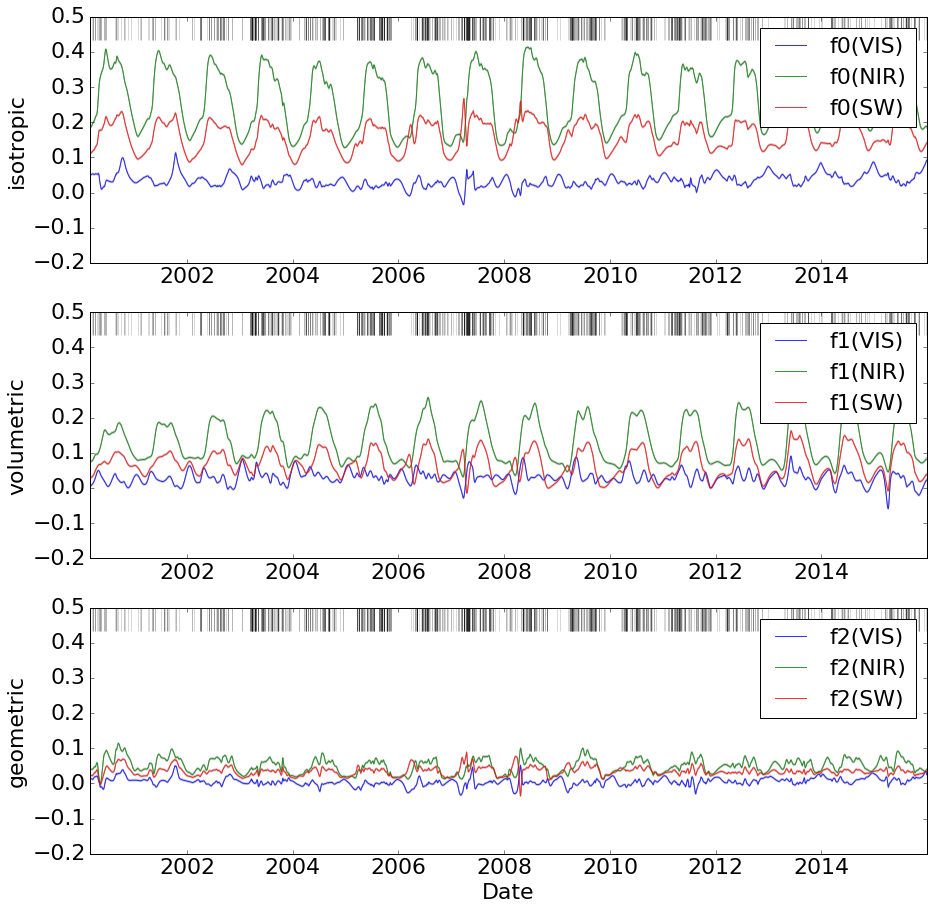

In [67]:
x, post_cov = compute_state_vector(pooled_dataset, 1.0E+5, 1.0E+1, ignore_weight=False, do_unc=True)
plot_state_vector(pooled_dataset, x, ymin=-0.2, ymax=0.5, post_cov=post_cov)
plt.show()

In [ ]:
# define range...
dlog0, dlogn = 5, 8
ylog0, ylogn = 0, 8

# perform a leaf-one-sensor-out cross validation...
dn = dlogn - dlog0 + 1
yn = ylogn - ylog0 + 1
rmses = shift_gamma_per_sensor_cv(pooled_dataset, \
                                  gammas_day=np.logspace(dlog0, dlogn, dn), gammas_year=np.logspace(ylog0, ylogn, yn))